Tarea 1 - Pregunta 3: memoria de cálculo

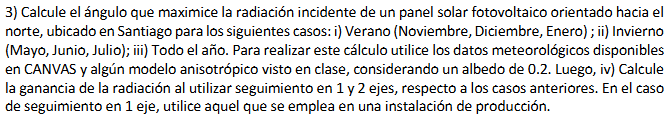

In [749]:
# Supuestos

# 1 El ángulo de inclinación que maximiza, por lógica, debe encontrarse entre beta = 0 y beta = 60

# 2 No se considera efecto alguno de algún objeto que interfiere con sombra

# 3 El albedo es constante = 0.2 para todo el año

# 4 Los valores de irradiancia son valores promedio para las distintas horas, en W/m2, por ende, representan al mismo tiempo el valor de energía por radiación disponible en W*h/m2.

In [750]:
# Importar librerías útiles

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

def sen(x):
    return np.sin(np.deg2rad(x))

def cos(x):
    return np.cos(np.deg2rad(x))

def tan(x):
    return np.tan(np.deg2rad(x))

def arcos(x):
    return np.rad2deg(np.arccos(x))

def adsin(x):
    return np.rad2deg(np.arcsin(x))

def adtan(x):
    return np.rad2deg(np.arctan(x))


# Funciones útiles para geometría solar

def declinacion(dia):
    return 23.45*sen(360*(284+dia)/366)

def ecuacion_del_tiempo(dia):
    b = (dia-1)*360/365
    E = 229.2*10**(-5)*(7.5+186*cos(b)-3200.7*sen(b)-1461.5*cos(2*b)-4089*sen(2*b))
    return E

def long_std(utc):
    return (utc)*15

def t_solar(t_local, long_loc, long_std, dia):
    return t_local*60+4*(long_loc-long_std)+ecuacion_del_tiempo(dia)

def ang_horario(t):
    return -180+t*15/60

def cenit_solar(lat, dec, w):
    return np.rad2deg(np.arccos(cos(lat)*cos(dec)*cos(w)+sen(lat)*sen(dec)))

def azimut_solar(w, cen, dec, lat):
    return np.rad2deg(np.sign(w)*np.abs(np.arccos((cos(cen)*sen(lat)-sen(dec))/(sen(cen)*cos(lat)))))+180

def incidencia(cenit, beta, azimut, acip):
    return np.rad2deg(np.arccos(cos(cenit)*cos(beta)+sen(cenit)*sen(beta)*cos(azimut-acip)))


def g_on(dia):
    # Dia es el numero del día en el año (1 a 365)
    # G_sc = 1361 W/m2 constante solar
    return 1361*(1+0.033*sen(360*dia/365))

In [751]:
# Para todo este problema, vamos a trabajar con la ubicación de Santiago de Chile

longstgo = -70
latstgo = -33.5
utc = -4

# Abrimos el archivo CSV de meteo data

data = pd.read_csv("ICM3253_METEO_DATA.csv")

# Veamos cómo es el archivo

data

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
0,2019,1,1,0,0,0,0,0,-5.3,18.1,925,19.89,106,1.1
1,2019,1,1,1,0,0,0,0,-5.9,17.7,925,19.50,109,1.1
2,2019,1,1,2,0,0,0,0,-6.5,17.1,925,19.33,107,1.2
3,2019,1,1,3,0,0,0,0,-7.5,16.5,925,18.60,102,1.2
4,2019,1,1,4,0,0,0,0,-8.8,16.3,925,17.07,93,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019,12,31,19,0,41,590,141,2.7,26.0,928,22.08,243,2.7
8756,2019,12,31,20,0,0,0,0,-2.5,22.1,925,19.18,164,0.7
8757,2019,12,31,21,0,0,0,0,-3.1,20.4,926,20.41,113,0.9
8758,2019,12,31,22,0,0,0,0,-3.8,19.5,926,20.47,107,0.9


In [752]:
# Suponemos que el ángulo de instalación es fijo, ya que por obviedad, se nos pregunta después cómo cambia con seguimiento

# La idea es encontrar ese ángulo que maximiza la radiación incidente anual

# Usemos modelo anisotrópico HDKR

In [753]:
# Suponemos que el ángulo de instalación es fijo, ya que por obviedad, se nos pregunta después cómo cambia con seguimiento

# La idea es encontrar ese ángulo que maximiza la radiación incidente en algún período en particular

# Usaremos modelo anisotrópico HDKR

import pandas as pd # debemos importar Pandas para trabajar con fechas

# Necesitamos el día del año en una columna

data["DayOfYear"] = pd.to_datetime(data[["Year", "Month", "Day"]]).dt.dayofyear

# Creamos nuevas columnas para los cálculos intermedios

data["tiempo_solar"] = t_solar(data["Hour"], longstgo, long_std(utc), data["DayOfYear"])
data["angulo_horario"] = ang_horario(data["tiempo_solar"])
data["declinacion"] = declinacion(data["DayOfYear"])
data["cenit_solar"] = cenit_solar(latstgo, data["declinacion"], data["angulo_horario"])
data["azimut_solar"] = azimut_solar(data["angulo_horario"], data["cenit_solar"], data["declinacion"], latstgo)
data["g_on"] = g_on(data["DayOfYear"])

i) Verano - meses de entre noviembre y enero inclusive

In [754]:
# Iremos primero por inspección. Calcularemos la irradiancia total incidente en un plano inclinado para varios ángulos de inclinación fijos.
# Haremos, de momento, para inclinaciones fijas de 0, 15, 30, 45 y 60 grados.
# 
#  Con ello, si existe un máximo entre esos cuatro puntos, podemos diseccionar. Es decir, sabemos que el máximo estará entre dicho ángulo y su siguiente. Esto se hará haciendo iteraciones con diferencias más pequeñas entre ángulos.


# Caso beta = 0 grados

#beta = 0
#acip = 0


# Aplicar a cada fila, beta = 0

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 15 y acip = 0

data["incidencia_0"] = incidencia(data["cenit_solar"], 0, data["azimut_solar"], 0)

def calc_I_t_beta_0(row, beta = 0, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_0"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_0"] = data.apply(calc_I_t_beta_0, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [755]:
# Caso beta = 15 grados

#beta = 15
#acip = 0


# Aplicar a cada fila, beta = 15

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 15 y acip = 0

data["incidencia_15"] = incidencia(data["cenit_solar"], 15, data["azimut_solar"], 0)

def calc_I_t_beta_15(row, beta = 15, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_15"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_15"] = data.apply(calc_I_t_beta_15, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [756]:
# Caso beta = 30 grados

#beta = 30
#acip = 0


# Aplicar a cada fila, beta = 30

# Debemos crear la columna de incidencia para el ángulo de beta = 30

data["incidencia_30"] = incidencia(data["cenit_solar"], 30, data["azimut_solar"], 0)

def calc_I_t_beta_30(row, beta = 30, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_30"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_30"] = data.apply(calc_I_t_beta_30, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [757]:
# Caso beta = 45 grados

#beta = 45
#acip = 0

# Aplicar a cada fila, beta = 45

# Debemos crear la columna de incidencia para el ángulo de beta = 30

data["incidencia_45"] = incidencia(data["cenit_solar"], 45, data["azimut_solar"], 0)

def calc_I_t_beta_45(row, beta = 45, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_45"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_45"] = data.apply(calc_I_t_beta_45, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [758]:
# Caso beta = 60 grados

#beta = 60
#acip = 0

# Aplicar a cada fila, beta = 60

# Debemos crear la columna de incidencia para el ángulo de beta = 30

data["incidencia_60"] = incidencia(data["cenit_solar"], 60, data["azimut_solar"], 0)

def calc_I_t_beta_60(row, beta = 60, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_60"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_60"] = data.apply(calc_I_t_beta_60, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [759]:
# Análisis para los meses de verano (noviembre a enero inclusive)

data_verano = data[(data["Month"]==11) | (data["Month"]==12) | (data["Month"]==1)]

In [760]:
# Ahora, aquella columna de incidencia que tenga una suma más alta de incidencia total durante el período en cuestión, será aquella candidata a que la Irradiación sea mayor.

radiacion_total_verano_0 = data_verano["It_beta_0"].sum()

radiacion_total_verano_15 = data_verano["It_beta_15"].sum()

radiacion_total_verano_30 = data_verano["It_beta_30"].sum()

radiacion_total_verano_45 = data_verano["It_beta_45"].sum()

radiacion_total_verano_60 = data_verano["It_beta_60"].sum()

print(radiacion_total_verano_0)

print(radiacion_total_verano_15)

print(radiacion_total_verano_30)

print(radiacion_total_verano_45)

print(radiacion_total_verano_60)

813178.5549429047
793173.6646851783
727674.3525181575
621470.3314025416
510389.5542117844


In [761]:
# Veamos antes de 15. 

# Inspeccionemos entre ángulos de 5. Calculemos para beta = 5 y beta = 10.

# Caso beta = 10 grados

# Aplicar a cada fila, beta = 10

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 10 y acip = 0

data["incidencia_10"] = incidencia(data["cenit_solar"], 10, data["azimut_solar"], 0)

def calc_I_t_beta_10(row, beta = 10, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_10"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_10"] = data.apply(calc_I_t_beta_10, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [762]:
# Caso beta = 5 grados

# Aplicar a cada fila, beta = 5

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 5 y acip = 0

data["incidencia_5"] = incidencia(data["cenit_solar"], 5, data["azimut_solar"], 0)

def calc_I_t_beta_5(row, beta = 5, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_5"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_5"] = data.apply(calc_I_t_beta_5, axis=1) # creamos la columna con la irradiancia total en este ángulo



In [763]:
# Debemos filtrar los datos de nuevo para no generar problemas en llamar a las columnas.

# Análisis para los meses de verano (noviembre a enero)

data_verano = data[(data["Month"]==11) | (data["Month"]==12) | (data["Month"]==1)]

In [764]:
radiacion_total_verano_5 = data_verano["It_beta_5"].sum()

radiacion_total_verano_10 = data_verano["It_beta_10"].sum()

print(radiacion_total_verano_0)

print(radiacion_total_verano_5)

print(radiacion_total_verano_10)

print(radiacion_total_verano_15)

813178.5549429047
811748.1785203534
805055.4475219934
793173.6646851783


In [765]:
# El ángulo óptimo para el verano es beta = 0

# Lo guardaremos en una lista de dos elementos

optimo_beta_verano = [0, radiacion_total_verano_0]

ii) Invierno - meses de entre mayo y julio inclusive

In [766]:
# Inspección entre ángulos de 15 igual que antes.

# Es de esperar ahora que el ángulo sea mayor, por ende no partiremos de cero y ahora el supuesto es que el ángulo óptimo será mayor.

# Veamos desde 30, hasta 60, con iteraciones entre 15.

# Ya tenemos los totales desde 30 hasta 60 para todo 

In [767]:
# Análisis para los meses de ivnierno (mayo a julio inclusive)

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

In [768]:
# Ahora, aquella columna de incidencia que tenga una suma más alta de incidencia total durante el período en cuestión, será aquella candidata a que la Irradiación sea mayor.

radiacion_total_invierno_30 = data_invierno["It_beta_30"].sum()

radiacion_total_invierno_45 = data_invierno["It_beta_45"].sum()

radiacion_total_invierno_60 = data_invierno["It_beta_60"].sum()

print(radiacion_total_invierno_30)

print(radiacion_total_invierno_45)

print(radiacion_total_invierno_60)

376676.97696610494
411747.5561655083
423017.06871838827


In [769]:
# Vemos que el mayor valor de radiación total se encuentra en el ángulo de beta = 60. Veamos qué pasa más adelante haciendo iteraciones de entre 5 y 5

# Haremos beta = 65, beta = 70, y beta = 75 de momento.

# Caso beta = 65 grados

#beta = 65
#acip = 0

# Aplicar a cada fila, beta = 65

# Debemos crear la columna de incidencia para el ángulo de beta = 65

data["incidencia_65"] = incidencia(data["cenit_solar"], 65, data["azimut_solar"], 0)

def calc_I_t_beta_65(row, beta = 65, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_65"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_65"] = data.apply(calc_I_t_beta_65, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [770]:
# Caso beta = 70 grados

#beta = 70
#acip = 0

# Aplicar a cada fila, beta = 70

# Debemos crear la columna de incidencia para el ángulo de beta = 70

data["incidencia_70"] = incidencia(data["cenit_solar"], 70, data["azimut_solar"], 0)

def calc_I_t_beta_70(row, beta = 70, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_70"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_70"] = data.apply(calc_I_t_beta_70, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [771]:
# Caso beta = 75 grados

#beta = 75
#acip = 0

# Aplicar a cada fila, beta = 75

# Debemos crear la columna de incidencia para el ángulo de beta = 75

data["incidencia_75"] = incidencia(data["cenit_solar"], 75, data["azimut_solar"], 0)

def calc_I_t_beta_75(row, beta = 75, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_75"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_75"] = data.apply(calc_I_t_beta_75, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [772]:
# Debemos filtrar los datos otra vez

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]
radiacion_total_invierno_60 = data_invierno["It_beta_60"].sum()
radiacion_total_invierno_65 = data_invierno["It_beta_65"].sum()
radiacion_total_invierno_70 = data_invierno["It_beta_70"].sum()
radiacion_total_invierno_75 = data_invierno["It_beta_75"].sum()

# Corroboramos

print(radiacion_total_invierno_45)
print(radiacion_total_invierno_60)
print(radiacion_total_invierno_65)
print(radiacion_total_invierno_70)
print(radiacion_total_invierno_75)


411747.5561655083
423017.06871838827
421262.94091013365
416736.72974704485
409458.4451626981


In [773]:
# Para beta = 45 obtuvimos 411747.5561655083

# Para beta = 60 obtuvimos 423017.06871838827

# Para beta = 65 obtuvimos 421262.94091013365

# Por ende, sabemos que el ánuglo que maximiza para los meses de invierno está entre 45 y 65.

# Probemos para beta = 62.5. Si la irradiación es mayor a 60, descartamos el intervalo [45, 60] y sabremos que l óptimo estará en [60, 65]

# Caso beta = 62.5 grados

#beta = 62.5
#acip = 0

# Aplicar a cada fila, beta = 62.5

# Debemos crear la columna de incidencia para el ángulo de beta = 62.5

data["incidencia_62.5"] = incidencia(data["cenit_solar"], 62.5, data["azimut_solar"], 0)

def calc_I_t_beta_62_5(row, beta = 62.5, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_62.5"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_62.5"] = data.apply(calc_I_t_beta_62_5, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [774]:
# Análisis para los meses de invierno (mayo a julio inclusive)

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

radiacion_total_invierno_62_5 = data_invierno["It_beta_62.5"].sum()

print(radiacion_total_invierno_62_5)

422486.9641439547


In [775]:
# Para beta = 45 obtuvimos 411747.5561655083

# Para beta = 60 obtuvimos 423017.06871838827

# Para beta = 62.5 obtuvimos 422486.9641439547

# Para beta = 65 obtuvimos 421262.94091013365

# Puede que el mejor ángulo se encuentre en el intervalo [45, 62.5]

In [776]:
# Probaremos con beta = 55 

# Caso beta = 55 grados

#beta = 55
#acip = 0

# Aplicar a cada fila, beta = 55

# Debemos crear la columna de incidencia para el ángulo de beta = 55

data["incidencia_55"] = incidencia(data["cenit_solar"], 55, data["azimut_solar"], 0)

def calc_I_t_beta_55(row, beta = 55, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_55"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_55"] = data.apply(calc_I_t_beta_55, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [777]:
# Debemos filtrar otra vez los datos

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

radiacion_total_invierno_55 = data_invierno["It_beta_55"].sum()

print(radiacion_total_invierno_55)

421999.43118688324


In [778]:
# Para beta = 45 obtuvimos 411747.5561655083

# Para beta = 55 obtuvimos 421999.43118688324

# Para beta = 60 obtuvimos 423017.06871838827

# Para beta = 62.5 obtuvimos 422486.9641439547

In [779]:
# Probemos para beta = 57.5

# Caso beta = 57.5 grados

#beta = 57.5
#acip = 0

# Aplicar a cada fila, beta = 57.5

# Debemos crear la columna de incidencia para el ángulo de beta = 57.5

data["incidencia_57.5"] = incidencia(data["cenit_solar"], 57.5, data["azimut_solar"], 0)

def calc_I_t_beta_57_5(row, beta = 57.5, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_57.5"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_57.5"] = data.apply(calc_I_t_beta_57_5, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [780]:
# Debemos filtrar otra vez los datos

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

radiacion_total_invierno_57_5 = data_invierno["It_beta_57.5"].sum()

print(radiacion_total_invierno_57_5)

422853.9249841458


In [781]:
# Para beta = 57.5 obtuvimos 422853.9249841458

# Para beta = 60 obtuvimos 423017.06871838827

# Para beta = 62.5 obtuvimos 422486.9641439547

# Ángulos menores a 57.5 y mayores a 62.5 quedan descartados

# Por ahora el intervalo es entre 57.5 y 62.5

# Haremos iteraciones de 1 en 1 partiendo desde 58

# Caso beta = 58 grados

#beta = 58
#acip = 0

# Aplicar a cada fila, beta = 58

# Debemos crear la columna de incidencia para el ángulo de beta = 58

data["incidencia_58"] = incidencia(data["cenit_solar"], 58, data["azimut_solar"], 0)

def calc_I_t_beta_58(row, beta = 58, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_58"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_58"] = data.apply(calc_I_t_beta_58, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [782]:
# Caso beta = 59 grados

#beta = 59
#acip = 0

# Aplicar a cada fila, beta = 59

# Debemos crear la columna de incidencia para el ángulo de beta = 59

data["incidencia_59"] = incidencia(data["cenit_solar"], 59, data["azimut_solar"], 0)

def calc_I_t_beta_59(row, beta = 59, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_59"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_59"] = data.apply(calc_I_t_beta_59, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [783]:
# Caso beta = 61 grados

#beta = 61
#acip = 0

# Aplicar a cada fila, beta = 61

# Debemos crear la columna de incidencia para el ángulo de beta = 61

data["incidencia_61"] = incidencia(data["cenit_solar"], 61, data["azimut_solar"], 0)

def calc_I_t_beta_61(row, beta = 61, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_61"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_61"] = data.apply(calc_I_t_beta_61, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [784]:
# Caso beta = 62 grados

#beta = 62
#acip = 0

# Aplicar a cada fila, beta = 62

# Debemos crear la columna de incidencia para el ángulo de beta = 62

data["incidencia_62"] = incidencia(data["cenit_solar"], 62, data["azimut_solar"], 0)

def calc_I_t_beta_62(row, beta = 62, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_62"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_62"] = data.apply(calc_I_t_beta_62, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [785]:
# Debemos filtrar otra vez los datos

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

radiacion_total_invierno_57_5 = data_invierno["It_beta_57.5"].sum()
radiacion_total_invierno_58 = data_invierno["It_beta_58"].sum()
radiacion_total_invierno_59 = data_invierno["It_beta_59"].sum()
radiacion_total_invierno_60 = data_invierno["It_beta_60"].sum()
radiacion_total_invierno_61 = data_invierno["It_beta_61"].sum()
radiacion_total_invierno_62 = data_invierno["It_beta_62"].sum()
radiacion_total_invierno_62_5 = data_invierno["It_beta_62.5"].sum()

print(radiacion_total_invierno_57_5)
print(radiacion_total_invierno_58)
print(radiacion_total_invierno_59)
print(radiacion_total_invierno_60)
print(radiacion_total_invierno_61)
print(radiacion_total_invierno_62)
print(radiacion_total_invierno_62_5)

422853.9249841458
422941.9399744744
423034.9219761075
423017.06871838827
422888.281977257
422648.4949667657
422486.9641439547


In [786]:
# Ahora, el intervalo está entre 58 y 60, con 59 el mejor hasta ahora

# 58 -> 422941.9399744744

# 59 -> 423034.9219761075

# 60 -> 423017.06871838827


In [787]:
# Probemos para beta = 58.5

# Caso beta = 58.5 grados

#beta = 58.5
#acip = 0

# Aplicar a cada fila, beta = 58.5

# Debemos crear la columna de incidencia para el ángulo de beta = 58.5

data["incidencia_58.5"] = incidencia(data["cenit_solar"], 58.5, data["azimut_solar"], 0)

def calc_I_t_beta_58_5(row, beta = 58.5, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_58.5"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_58.5"] = data.apply(calc_I_t_beta_58_5, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [788]:
# Caso beta = 59.5 grados

#beta = 59.5
#acip = 0

# Aplicar a cada fila, beta = 59.5

# Debemos crear la columna de incidencia para el ángulo de beta = 59.5

data["incidencia_59.5"] = incidencia(data["cenit_solar"], 59.5, data["azimut_solar"], 0)

def calc_I_t_beta_59_5(row, beta = 59.5, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90 and cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) >= 0:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_59.5"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref

data["It_beta_59.5"] = data.apply(calc_I_t_beta_59_5, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [789]:
# Debemos filtrar otra vez los datos

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

radiacion_total_invierno_58 = data_invierno["It_beta_58"].sum()
radiacion_total_invierno_58_5 = data_invierno["It_beta_58.5"].sum()
radiacion_total_invierno_59 = data_invierno["It_beta_59"].sum()
radiacion_total_invierno_59_5 = data_invierno["It_beta_59.5"].sum()
radiacion_total_invierno_60 = data_invierno["It_beta_60"].sum()

print(radiacion_total_invierno_58)
print(radiacion_total_invierno_58_5)
print(radiacion_total_invierno_59)
print(radiacion_total_invierno_59_5)
print(radiacion_total_invierno_60)

422941.9399744744
423002.2780221501
423034.9219761075
423039.85662772646
423017.06871838827


In [790]:
# 58 -> 422941.9399744744
# 58.5 -> 423002.2780221501
# 59 -> 423034.9219761075
# 59.5 -> 423039.85662772646
# 60 -> 423017.06871838827

# Con esto, por un margen de error muy bajo, el ángulo que maximiza la radiación en invierno es de 59.5

# Lo guardaremos en una lista de dos elementos

optimo_beta_invierno = [59.5, radiacion_total_invierno_59_5]

iii) Todo el año

In [791]:
radiacion_total_0 = data["It_beta_0"].sum()
radiacion_total_15 = data["It_beta_15"].sum()
radiacion_total_30 = data["It_beta_30"].sum()
radiacion_total_45 = data["It_beta_45"].sum()
radiacion_total_60 = data["It_beta_60"].sum()

print(radiacion_total_0)
print(radiacion_total_15)
print(radiacion_total_30)
print(radiacion_total_45)
print(radiacion_total_60)

2107754.89612629
2277051.7988549955
2316132.2669533556
2223349.271931975
2037132.8587889615


In [792]:
# Está entre 15 y 45

# Por el momento, haremos disecciones de a 5 grados. Desde 25 hasta 45


# Caso beta = 25 grados

#beta = 25
#acip = 0


# Aplicar a cada fila, beta = 25

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 25 y acip = 0

data["incidencia_25"] = incidencia(data["cenit_solar"], 25, data["azimut_solar"], 0)

def calc_I_t_beta_25(row, beta = 25, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_25"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_25"] = data.apply(calc_I_t_beta_25, axis=1) # creamos la columna con la irradiancia total en este ángulo



# Caso beta = 35 grados

#beta = 35
#acip = 0


# Aplicar a cada fila, beta = 0

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 15 y acip = 0

data["incidencia_35"] = incidencia(data["cenit_solar"], 35, data["azimut_solar"], 0)

def calc_I_t_beta_35(row, beta = 35, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_35"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_35"] = data.apply(calc_I_t_beta_35, axis=1) # creamos la columna con la irradiancia total en este ángulo


# Caso beta = 40 grados

#beta = 40
#acip = 0


# Aplicar a cada fila, beta = 40

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 40 y acip = 0

data["incidencia_40"] = incidencia(data["cenit_solar"], 40, data["azimut_solar"], 0)

def calc_I_t_beta_40(row, beta = 40, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_40"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_40"] = data.apply(calc_I_t_beta_40, axis=1) # creamos la columna con la irradiancia total en este ángulo


In [793]:
radiacion_total_25 = data["It_beta_25"].sum()
radiacion_total_30 = data["It_beta_30"].sum()
radiacion_total_35 = data["It_beta_35"].sum()
radiacion_total_40 = data["It_beta_40"].sum()
radiacion_total_45 = data["It_beta_45"].sum()

print(radiacion_total_25)
print(radiacion_total_30)
print(radiacion_total_35)
print(radiacion_total_40)
print(radiacion_total_45)

2317839.1805839627
2316132.2669533556
2299709.827922831
2268705.9494532803
2223349.271931975


In [794]:
# El máximo está en un ángulo menor a 30.

# Veamos para 20

# Caso beta = 20 grados

#beta = 20
#acip = 0

# Aplicar a cada fila, beta = 20

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 20 y acip = 0

data["incidencia_20"] = incidencia(data["cenit_solar"], 20, data["azimut_solar"], 0)

def calc_I_t_beta_20(row, beta = 20, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_20"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_20"] = data.apply(calc_I_t_beta_20, axis=1) # creamos la columna con la irradiancia total en este ángulo



In [795]:
radiacion_total_20 = data["It_beta_20"].sum()
radiacion_total_25 = data["It_beta_25"].sum()
radiacion_total_30 = data["It_beta_30"].sum()

print(radiacion_total_20)
print(radiacion_total_25)
print(radiacion_total_30)

2304792.517806993
2317839.1805839627
2316132.2669533556


In [796]:
# Ahora iteremos en ángulos de 1 desde 25 hacia el medio.

# Es decir, veamos para 24, 25 y 26 de momento

# Caso beta = 24 grados

#beta = 24
#acip = 0

# Aplicar a cada fila, beta = 24

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 24 y acip = 0

data["incidencia_24"] = incidencia(data["cenit_solar"], 24, data["azimut_solar"], 0)

def calc_I_t_beta_24(row, beta = 24, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_24"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_24"] = data.apply(calc_I_t_beta_24, axis=1) # creamos la columna con la irradiancia total en este ángulo


# Caso beta = 26 grados

#beta = 26
#acip = 0

# Aplicar a cada fila, beta = 26

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 26 y acip = 0

data["incidencia_26"] = incidencia(data["cenit_solar"], 26, data["azimut_solar"], 0)

def calc_I_t_beta_26(row, beta = 26, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_26"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_26"] = data.apply(calc_I_t_beta_26, axis=1) # creamos la columna con la irradiancia total en este ángulo



In [797]:
radiacion_total_24 = data["It_beta_24"].sum()
radiacion_total_25 = data["It_beta_25"].sum()
radiacion_total_26 = data["It_beta_26"].sum()

print(radiacion_total_24)
print(radiacion_total_25)
print(radiacion_total_26)

2316409.644316012
2317839.1805839627
2318678.261561913


In [798]:
# Caso beta = 27 grados

#beta = 27
#acip = 0

# Aplicar a cada fila, beta = 27

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 27 y acip = 0

data["incidencia_27"] = incidencia(data["cenit_solar"], 27, data["azimut_solar"], 0)

def calc_I_t_beta_27(row, beta = 27, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_27"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_27"] = data.apply(calc_I_t_beta_27, axis=1) # creamos la columna con la irradiancia total en este ángulo



# Caso beta = 28 grados

#beta = 28
#acip = 0

# Aplicar a cada fila, beta = 28

# La incidencia debemos crearla. Depende del beta. Por ahora , acip = 0
# beta = 28 y acip = 0

data["incidencia_28"] = incidencia(data["cenit_solar"], 28, data["azimut_solar"], 0)

def calc_I_t_beta_28(row, beta = 28, acip = 0):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(incidencia(row["cenit_solar"], beta, row["azimut_solar"], acip)) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["incidencia_28"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(beta))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(beta/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(beta))/2)
    
    return I_dir_y_cir + I_dif + I_ref


data["It_beta_28"] = data.apply(calc_I_t_beta_28, axis=1) # creamos la columna con la irradiancia total en este ángulo

In [799]:
radiacion_total_25 = data["It_beta_25"].sum()
radiacion_total_26 = data["It_beta_26"].sum()
radiacion_total_27 = data["It_beta_27"].sum()
radiacion_total_28 = data["It_beta_28"].sum()

print(radiacion_total_25)
print(radiacion_total_26)
print(radiacion_total_27)
print(radiacion_total_28)

2317839.1805839627
2318678.261561913
2318926.8824039996
2318585.1938832477


In [800]:
# Con un margen de error muy bajo, el ángulo que maximiza la irradiancia total durante todo el año es beta = 27 grados

# Lo guardaremos en una lista de dos elementos

optimo_beta_todo_el_año = [27, radiacion_total_27]

iv) Ganancia al utilizar seguimiento en 1 eje.

In [801]:
# Supuesto:

# 1 En todo el año se utiliza la misma orientación. Es decir, no se cambia de tipo de seguimiento según época. Es siempre el mismo tipo de seguimiento

# 2 En Chile, en general se utiliza el seguimiento EO, con eje NS horizontal.

In [802]:
# En Chile, en general se utiliza el seguimiento EO, con eje NS horizontal.

# Vamos a limpiar la base de datos y cargarla de nuevo para no tener tantas columnas que no utilizaremos

data = pd.read_csv("ICM3253_METEO_DATA.csv")

# Necesitamos el día del año en una columna

data["DayOfYear"] = pd.to_datetime(data[["Year", "Month", "Day"]]).dt.dayofyear

# Creamos nuevas columnas para los cálculos intermedios

data["tiempo_solar"] = t_solar(data["Hour"], longstgo, long_std(utc), data["DayOfYear"])
data["angulo_horario"] = ang_horario(data["tiempo_solar"])
data["declinacion"] = declinacion(data["DayOfYear"])
data["cenit_solar"] = cenit_solar(latstgo, data["declinacion"], data["angulo_horario"])
data["azimut_solar"] = azimut_solar(data["angulo_horario"], data["cenit_solar"], data["declinacion"], latstgo)
data["g_on"] = g_on(data["DayOfYear"])

# Recordemos que está en convención sur, es decir el 0 es el norte, y el acimut va entre 0 y 360. 

In [803]:
# Transformemos los azimut de convención sur a convención norte (donde el sur sea el cero)

def convertir_azimut_hf(azimut):
    if 0 <= azimut < 180:
        return azimut + 180
    else:
        return azimut - 180

data["azimut_solar_hf"] = data["azimut_solar"].apply(convertir_azimut_hf)

In [804]:
# data[3008:3018]

In [805]:
# Necesitamos crear los ángulos beta (inclinación respecto al plano horizontal), gamma (inclinación respecto al eje NS), y theta (incidencia)

def crear_γ(azimut_solar):

    # azimut_solar es el γ_s
    # azimut_superficie es el γ

    if azimut_solar > 0:
        azimut_superficie = 90
    else:
        azimut_superficie = 270

    return azimut_superficie


def crear_β(cenit, azimut_solar):

    # azimut_solar es el γ_s
    # azimut_superficie es el γ

    tan_beta = tan(cenit)*np.abs(cos(crear_γ(azimut_solar) - azimut_solar))

    beta = adtan(tan_beta)

    return beta

def crear_θ(cenit, declinacion, angulo_horario):

    # cenit es el θ_z
    # incidencia es el θ
    # declinación es el δ
    # horario es el ω

    cos_theta = np.sqrt((cos(cenit)**2 + (cos(declinacion)**2)*(sen(angulo_horario)**2)))
        
    theta = arcos(cos_theta)

    return np.abs(theta)

In [806]:
# Creamos el azimut de la superficie en el data frame

data["azimut_superficie"] = data["azimut_solar"].apply(crear_γ)

# Creamos el ángulo de inclinación beta de la superficie

data["angulo_inclinacion_beta"] = data.apply(lambda row: crear_β(row["cenit_solar"], row["azimut_solar"]), axis=1)

# Creamos el ángulo de incidencia

data["angulo_incidencia_superficie"] = data.apply(lambda row: crear_θ(row["cenit_solar"], row["declinacion"], row["angulo_horario"]), axis=1)


In [807]:
# Con todos estos ángulos creados, ya se puede calcular la irradiancia total según la fecha.

# data[3008:3018]

In [808]:
# Caso 1: comparación en los meses de verano - angulo fijo versus seguimiento en un eje

def calc_I_t_seg_1E(row):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(row["angulo_incidencia_superficie"]) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["angulo_incidencia_superficie"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(row["angulo_inclinacion_beta"]))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(row["angulo_inclinacion_beta"]/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(row["angulo_inclinacion_beta"]))/2)
    
    return I_dir_y_cir + I_dif + I_ref

In [809]:
data["It_seg_1E"] = data.apply(calc_I_t_seg_1E, axis=1) # creamos la columna con la irradiancia total con seguimiento en un eje


# Debemos ahora filtrar los meses de verano del data frame, para comparar

data_verano = data[(data["Month"]==11) | (data["Month"]==12) | (data["Month"]==1)]


radiacion_total_verano_seguimiento_1E = data_verano["It_seg_1E"].sum()

radiacion_total_verano_seguimiento_1E

np.float64(1171975.032943937)

In [810]:
# Se obtiene 1171975.032943937 Wh/m2 de irradiación total en el año

In [811]:
print(f"El seguimiento en un eje, durante el verano, mejoró en un {100*(radiacion_total_verano_seguimiento_1E - radiacion_total_verano_0)/(radiacion_total_verano_0)} porciento con respecto al ángulo fijo, que era de {optimo_beta_verano[0]} grados" ) 

El seguimiento en un eje, durante el verano, mejoró en un 44.122717676221086 porciento con respecto al ángulo fijo, que era de 0 grados


In [812]:
# Caso 2: comparación en los meses de invierno - angulo fijo versus seguimiento en un eje

# Debemos ahora filtrar los meses de invierno del data frame, para comparar

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

# Obtenemos el valor de la irradiancia en Wh/m2 en los meses de invierno utilizando seguimiento

radiacion_total_invierno_seguimiento_1E = data_invierno["It_seg_1E"].sum()

radiacion_total_invierno_seguimiento_1E

np.float64(369196.0245195172)

In [813]:
print(f"El seguimiento en un eje, durante el invierno, mejoró en un {100*(radiacion_total_invierno_seguimiento_1E - radiacion_total_invierno_59_5)/(radiacion_total_invierno_59_5)} porciento con respecto al ángulo fijo, que era de {optimo_beta_invierno[0]} grados" ) 

El seguimiento en un eje, durante el invierno, mejoró en un -12.727839059285527 porciento con respecto al ángulo fijo, que era de 59.5 grados


In [814]:
# Caso 3: comparación en todo el año

radiacion_total_año_seguimiento_1E = data["It_seg_1E"].sum()

radiacion_total_año_seguimiento_1E

np.float64(3083578.898267594)

In [815]:
print(f"El seguimiento en un eje, durante todo el año, mejoró en un {100*(radiacion_total_año_seguimiento_1E - radiacion_total_27)/(radiacion_total_27)} porciento con respecto al ángulo fijo, que era de {optimo_beta_todo_el_año[0]} grados" ) 

El seguimiento en un eje, durante todo el año, mejoró en un 32.974390942024456 porciento con respecto al ángulo fijo, que era de 27 grados


v) Ganancia al utilizar seguimiento en 2 ejes

In [816]:
# Vamos a limpiar la base de datos y cargarla de nuevo para no tener tantas columnas que no utilizaremos

data = pd.read_csv("ICM3253_METEO_DATA.csv")

# Necesitamos el día del año en una columna

data["DayOfYear"] = pd.to_datetime(data[["Year", "Month", "Day"]]).dt.dayofyear

# Creamos nuevas columnas para los cálculos intermedios

data["tiempo_solar"] = t_solar(data["Hour"], longstgo, long_std(utc), data["DayOfYear"])
data["angulo_horario"] = ang_horario(data["tiempo_solar"])
data["declinacion"] = declinacion(data["DayOfYear"])
data["cenit_solar"] = cenit_solar(latstgo, data["declinacion"], data["angulo_horario"])
data["azimut_solar"] = azimut_solar(data["angulo_horario"], data["cenit_solar"], data["declinacion"], latstgo)
data["g_on"] = g_on(data["DayOfYear"])

# Recordemos que está en convención sur, es decir el 0 es el norte, y el acimut va entre 0 y 360. 

# Transformemos los azimut de convención sur a convención norte (donde el sur sea el cero)

def convertir_azimut_hf(azimut):
    if 0 <= azimut < 180:
        return azimut + 180
    else:
        return azimut - 180

data["azimut_solar_hf"] = data["azimut_solar"].apply(convertir_azimut_hf)

In [817]:
# Necesitamos crear los ángulos beta (inclinación respecto al plano horizontal), gamma (inclinación respecto al eje NS), y theta (incidencia)

# Ahora, el seguimiento en dos ejes hace que la transformación sea más simple.

# Redefinimos las funciones para poder usar el mismo código

def crear_γ(azimut_solar):

    # azimut_solar es el γ_s
    # azimut_superficie es el γ

    return azimut_solar

def crear_β(cenit, azimut_solar):

    return cenit

def crear_θ(cenit, declinacion, angulo_horario):

    return 0

    # XD


In [818]:
# Creamos el azimut de la superficie en el data frame

data["azimut_superficie"] = data["azimut_solar"].apply(crear_γ)

# Creamos el ángulo de inclinación beta de la superficie

data["angulo_inclinacion_beta"] = data.apply(lambda row: crear_β(row["cenit_solar"], row["azimut_solar"]), axis=1)

# Creamos el ángulo de incidencia

data["angulo_incidencia_superficie"] = data.apply(lambda row: crear_θ(row["cenit_solar"], row["declinacion"], row["angulo_horario"]), axis=1)

In [819]:
def calc_I_t_seg_2E(row):

    # Directa + circumsolar
    I_dir_y_cir = 0
    if row["cenit_solar"] < 90:
        I_dir_y_cir = row["DNI"]*cos(row["angulo_incidencia_superficie"]) \
        + row["DHI"]*(row["DNI"]/row["g_on"])*(cos(row["angulo_incidencia_superficie"])/cos(row["cenit_solar"]))
    
    # Difusa
    I_dif = 0
    if row["GHI"] > 0:
        I_dif = row["DHI"]*(1-(row["DNI"]/row["g_on"]))*((1 + cos(row["angulo_inclinacion_beta"]))/2) * \
        (1 + np.sqrt(row["DNI"] * cos(row["cenit_solar"])/row["GHI"]) * (sen(row["angulo_inclinacion_beta"]/2))**3)
    

    # Reflejada
    I_ref = row["GHI"]*0.2*((1 - cos(row["angulo_inclinacion_beta"]))/2)
    
    return I_dir_y_cir + I_dif + I_ref

In [820]:
data["It_seg_2E"] = data.apply(calc_I_t_seg_2E, axis=1) # creamos la columna con la irradiancia total con seguimiento en 2 ejes

In [821]:
# Caso 1: meses de verano

# Debemos ahora filtrar los meses de verano del data frame, para comparar

data_verano = data[(data["Month"]==11) | (data["Month"]==12) | (data["Month"]==1)]

radiacion_total_verano_seguimiento_2E = data_verano["It_seg_2E"].sum()

radiacion_total_verano_seguimiento_2E

np.float64(1191811.937358848)

In [822]:
# Se obtiene 1191811.937358848 Wh/m2

In [823]:
print(f"El seguimiento en dos ejes, durante el verano, mejoró en un {100*(radiacion_total_verano_seguimiento_2E - radiacion_total_verano_0)/(radiacion_total_verano_0)} porciento con respecto al ángulo fijo, que era de {optimo_beta_verano[0]} grados" ) 

El seguimiento en dos ejes, durante el verano, mejoró en un 46.562145560088965 porciento con respecto al ángulo fijo, que era de 0 grados


In [824]:
# Caso 2: meses de invierno

# Debemos ahora filtrar los meses de invierno del data frame, para comparar

data_invierno = data[(data["Month"]==5) | (data["Month"]==6) | (data["Month"]==7)]

radiacion_total_invierno_seguimiento_2E = data_invierno["It_seg_2E"].sum()

radiacion_total_invierno_seguimiento_2E

np.float64(503997.4906106087)

In [825]:
# Se obtiene 503997.4906106087 Wh/m2

In [826]:
print(f"El seguimiento en dos ejes, durante el invierno, mejoró en un {100*(radiacion_total_invierno_seguimiento_2E - radiacion_total_invierno_59_5)/(radiacion_total_invierno_59_5)} porciento con respecto al ángulo fijo, que era de {optimo_beta_invierno[0]} grados" ) 

El seguimiento en dos ejes, durante el invierno, mejoró en un 19.137117393202193 porciento con respecto al ángulo fijo, que era de 59.5 grados


In [827]:
# Caso 3: comparación en todo el año

radiacion_total_año_seguimiento_2E = data["It_seg_2E"].sum()

radiacion_total_año_seguimiento_2E

np.float64(3396069.43136319)

In [828]:
# Se obtiene 3396069.43136319 Wh/m2

In [829]:
print(f"El seguimiento en dos ejes, durante todo el año, mejoró en un {100*(radiacion_total_año_seguimiento_2E - radiacion_total_27)/(radiacion_total_27)} porciento con respecto al ángulo fijo, que era de {optimo_beta_todo_el_año[0]} grados" ) 

El seguimiento en dos ejes, durante todo el año, mejoró en un 46.450043644434864 porciento con respecto al ángulo fijo, que era de 27 grados
